# Today's Coding Topics
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/data-programming-with-python/blob/main/2023-summmer/2023-06-28/notebook/concept_and_code_demo.ipynb)

* Recap of previous lecture
* Statistics with Python


# Recap of previous lecture

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns',None) #unlimited
pd.set_option('display.max_rows',None)

## Pandas practice

In [3]:
%%time

Employees = pd.read_excel('../data/Employees.xls')
Territory = pd.read_excel('../data/SalesTerritory.xls')
Customers = pd.read_excel('../data/Customers.xls')
Orders = pd.read_excel('../data/ItemsOrdered.xls')

CPU times: user 41.7 ms, sys: 5.25 ms, total: 46.9 ms
Wall time: 47.8 ms


In [4]:
Employees.head(2)

,EmployeeID,ManagerID,TerritoryID,Title,FirstName,MiddleName,LastName,Suffix,JobTitle,NationalIDNumber,BirthDate,MaritalStatus,Gender,HireDate,SalariedFlag,VacationHours,SickLeaveHours,PhoneNumber,PhoneNumberType,EmailAddress,AddressLine1,AddressLine2,City,StateProvinceName,PostalCode,CountryName
0,259,250.0,NaN,NaN,Ben,T,Miller,NaN,Buyer,20269531,1967-07-05,M,M,2004-04-09,0,55,47,151-555-0113,Work,ben0@adventure-works.com,101 Candy Rd.,NaN,Redmond,Washington,98052,United States
1,278,274.0,6.0,NaN,Garrett,R,Vargas,NaN,Sales Representative,234474252,1969-03-07,M,M,2005-07-01,1,33,36,922-555-0165,Work,garrett1@mapleleafmail.ca,10203 Acorn Avenue,NaN,Calgary,Alberta,T2P 2G8,Canada


In [5]:
Territory.head(2)

,TerritoryID,Name,CountryCode,Region,SalesYTD,SalesLastYear
0,1,Northwest,US,North America,7887186.79,3298694.49
1,2,Northeast,US,North America,2402176.85,3607148.94


In [6]:
Customers.head(2)

,CustomerID,SalesTerritoryID,FirstName,LastName,City,StateName
0,10101,1,John,Gray,Lynden,Washington
1,10298,4,Leroy,Brown,Pinetop,Arizona


In [7]:
Orders.head(2)

,CustomerID,OrderDate,Item,Quantity,Price
0,10330,2004-06-30,Pogo stick,1,28.0
1,10101,2004-06-30,Raft,1,58.0


### Grouping

Reading Materials: 
* (official doc): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html
* (summary) https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

#### What is the earliest birthdate for all employees?

SQL logic
```sql
SELECT MIN(e.BirthDate) FROM dbo.Employees AS e;
```

In [8]:
Employees.head(3)

,EmployeeID,ManagerID,TerritoryID,Title,FirstName,MiddleName,LastName,Suffix,JobTitle,NationalIDNumber,BirthDate,MaritalStatus,Gender,HireDate,SalariedFlag,VacationHours,SickLeaveHours,PhoneNumber,PhoneNumberType,EmailAddress,AddressLine1,AddressLine2,City,StateProvinceName,PostalCode,CountryName
0,259,250.0,NaN,NaN,Ben,T,Miller,NaN,Buyer,20269531,1967-07-05,M,M,2004-04-09,0,55,47,151-555-0113,Work,ben0@adventure-works.com,101 Candy Rd.,NaN,Redmond,Washington,98052,United States
1,278,274.0,6.0,NaN,Garrett,R,Vargas,NaN,Sales Representative,234474252,1969-03-07,M,M,2005-07-01,1,33,36,922-555-0165,Work,garrett1@mapleleafmail.ca,10203 Acorn Avenue,NaN,Calgary,Alberta,T2P 2G8,Canada
2,204,26.0,NaN,NaN,Gabe,B,Mares,NaN,Production Technician - WC40,440379437,1982-06-11,M,M,2003-04-09,0,57,48,310-555-0117,Work,gabe0@adventure-works.com,1061 Buskrik Avenue,NaN,Edmonds,Washington,98020,United States


In [9]:
Employees.columns

Index(['EmployeeID', 'ManagerID', 'TerritoryID', 'Title', 'FirstName',
       'MiddleName', 'LastName', 'Suffix', 'JobTitle', 'NationalIDNumber',
       'BirthDate', 'MaritalStatus', 'Gender', 'HireDate', 'SalariedFlag',
       'VacationHours', 'SickLeaveHours', 'PhoneNumber', 'PhoneNumberType',
       'EmailAddress', 'AddressLine1', 'AddressLine2', 'City',
       'StateProvinceName', 'PostalCode', 'CountryName'],
      dtype='object')

In [10]:
type(Employees.dtypes)

pandas.core.series.Series

In [11]:
Employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   EmployeeID         291 non-null    int64         
 1   ManagerID          290 non-null    float64       
 2   TerritoryID        14 non-null     float64       
 3   Title              8 non-null      object        
 4   FirstName          291 non-null    object        
 5   MiddleName         278 non-null    object        
 6   LastName           291 non-null    object        
 7   Suffix             2 non-null      object        
 8   JobTitle           291 non-null    object        
 9   NationalIDNumber   291 non-null    int64         
 10  BirthDate          291 non-null    object        
 11  MaritalStatus      291 non-null    object        
 12  Gender             291 non-null    object        
 13  HireDate           291 non-null    datetime64[ns]
 14  SalariedFl

In [13]:
Employees.loc[:,['BirthDate']].head(3)

,BirthDate
0,1967-07-05
1,1969-03-07
2,1982-06-11


In [ ]:
# Employees.dtypes.reset_index()
# Employees.dtypes['BirthDate']
str(Employees.dtypes['BirthDate'])

In [ ]:
Employees.BirthDate.dtypes

In [15]:
'1970-01-01' < '2023-06-26'

True

In [16]:
Employees.BirthDate.min()

'1945-11-17'

In [17]:
Employees.BirthDate.max()

'1985-07-01'

In [18]:
Employees.BirthDate.nunique()

279

In [19]:
Employees.shape

(291, 26)

In [20]:
Employees.EmployeeID.nunique()

291

#### Add to the above, the most recent birthdate for all employees

SQL logic
```sql
SELECT 
  MIN(e.BirthDate) AS 'Earliest Birthday'
  , MAX(e.BirthDate) AS 'Most Reecent Birthday'
FROM dbo.Employees AS e;
```

In [22]:
x = [4,5,1,2,3]
min(x), max(x)

(1, 5)

* Lexicographic order [[wikipedia](https://en.wikipedia.org/wiki/Lexicographic_order)]

In [ ]:
'2ab' < '1ab'

In [ ]:
# 'abcdefg'

'a' > 'b'

In [21]:
Employees.agg({'BirthDate':[min,max]})

,BirthDate
min,1945-11-17
max,1985-07-01


In [23]:
Employees.agg({'BirthDate':[min,max]}).T

,min,max
BirthDate,1945-11-17,1985-07-01


In [24]:
Employees.agg({'BirthDate':[min,max]}).T.reset_index()

,index,min,max
0,BirthDate,1945-11-17,1985-07-01


In [25]:
Employees.agg({'BirthDate':[min,max]}).T.reset_index(drop=True)

,min,max
0,1945-11-17,1985-07-01


#### Show the above results broken down by gender

SQL logic
```sql
SELECT 
  e.Gender
  , MIN(e.BirthDate) AS 'Earliest Birthday'
  , MAX(e.BirthDate) AS 'Most Reecent Birthday'
FROM dbo.Employees AS e
GROUP BY e.Gender
;
```

In [26]:
Employees.groupby('Gender')['BirthDate'].min()

Gender
F    1946-10-29
M    1945-11-17
Name: BirthDate, dtype: object

In [27]:
Employees.groupby('Gender')['BirthDate'].min().reset_index()

,Gender,BirthDate
0,F,1946-10-29
1,M,1945-11-17


In [28]:
Employees.groupby('Gender')['BirthDate'].max().reset_index()

,Gender,BirthDate
0,F,1985-07-01
1,M,1985-05-07


In [29]:
Employees.groupby('Gender').agg({'BirthDate':[min,max]})

BirthDate            
               min         max
Gender                        
F       1946-10-29  1985-07-01
M       1945-11-17  1985-05-07

In [31]:
Employees.groupby('Gender').agg(
    min_bday=('BirthDate',min),
    max_bday=('BirthDate',max)
)

,min_bday,max_bday
Gender,,
F,1946-10-29,1985-07-01
M,1945-11-17,1985-05-07


In [32]:
Employees.groupby('Gender').agg(
    min_bday=('BirthDate',min),
    max_bday=('BirthDate',max)
).reset_index()

,Gender,min_bday,max_bday
0,F,1946-10-29,1985-07-01
1,M,1945-11-17,1985-05-07


#### Show the above results broken down by gender, and salaried/hourly

SQL logic
```sql
SELECT 
  e.Gender
  , e.SalariedFlag
  , MIN(e.BirthDate) AS 'Earliest Birthday'
  , MAX(e.BirthDate) AS 'Most Reecent Birthday'
FROM dbo.Employees AS e
GROUP BY e.Gender, e.SalariedFlag
;
```

In [34]:
Employees.loc[:, ['SalariedFlag']].head(5)

,SalariedFlag
0,0
1,1
2,0
3,0
4,0


In [35]:
Employees.SalariedFlag.nunique()

2

In [36]:
Employees.groupby(['Gender','SalariedFlag']).agg(
    min_bday=('BirthDate',min),
    max_bday=('BirthDate',max)
).reset_index()

,Gender,SalariedFlag,min_bday,max_bday
0,F,0,1948-05-25,1985-07-01
1,F,1,1946-10-29,1980-07-06
2,M,0,1946-04-03,1985-05-07
3,M,1,1945-11-17,1982-04-14


#### What are the average vacation hours for all employees?

SQL logic
```sql
SELECT AVG(e.VacationHours)
FROM dbo.Employees AS e	
;
```

In [37]:
Employees.VacationHours.mean()

50.628865979381445

#### Show the above results broken down and ordered by job title¶

SQL logic
```sql
SELECT 
  e.JobTitle
  , AVG(e.VacationHours) AS 'Average Vacation'
  , MIN(e.VacationHours) AS 'Minimum Vacation'
FROM dbo.Employees AS e
GROUP BY e.JobTitle
;
```

In [38]:
Employees.groupby('JobTitle')['VacationHours'].min().reset_index().head(3)

,JobTitle,VacationHours
0,Accountant,58
1,Accounts Manager,57
2,Accounts Payable Specialist,63


In [39]:
Employees.groupby('JobTitle')['VacationHours'].mean().reset_index().head(3)

,JobTitle,VacationHours
0,Accountant,58.5
1,Accounts Manager,57.0
2,Accounts Payable Specialist,63.5


In [43]:
Employees.groupby('JobTitle')['VacationHours'].apply(lambda x: sum(x)/len(x)).reset_index().head(3)

,JobTitle,VacationHours
0,Accountant,58.5
1,Accounts Manager,57.0
2,Accounts Payable Specialist,63.5


In [44]:
Employees.groupby('JobTitle').agg(
    avg_pto_left=('VacationHours',lambda x: sum(x)/len(x)),
    min_pto_left=('VacationHours',min)
).reset_index().head(3)

,JobTitle,avg_pto_left,min_pto_left
0,Accountant,58.5,58
1,Accounts Manager,57.0,57
2,Accounts Payable Specialist,63.5,63


# The Python Statistics Landscape

There are many Python statistics libraries for you to work with.

* **Foundation Libraries**
    * `statistics`: built-in Python library for descriptive statistics (link: https://docs.python.org/3/library/statistics.html)
    * `numpy`: numerical computing, numpy arrays
    * `scipy`: scientific computing based on numpy, the `scipy.stats` module (link: https://docs.scipy.org/doc/scipy/reference/stats.html) covers a large number of probability distributions and statistical functions (link: https://www.scipy.org/)
    
* **Data Science Libraries**
    * `pandas`: 1D and 2D labeled data manipulations and computation
    * `statsmodels`: a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration (link: https://www.statsmodels.org/stable/index.html)
    * `matplotlib`: graphs and visualization (link: https://matplotlib.org/)

# Descriptive Statistical Analysis

Descriptive statistics is about describing and summarizing data. It uses two main approaches:

* The quantitative approach describes and summarizes data numerically.
* The visual approach illustrates data with charts, plots, histograms, and other graphs.

You can apply descriptive statistics to one or many datasets or variables. When you describe and summarize a single variable, you’re performing univariate analysis. When you search for statistical relationships among a pair of variables, you’re doing a bivariate analysis. Similarly, a multivariate analysis is concerned with multiple variables at once.


**[Case Study]**

**Atlanta Police Department Crime Data** ![APD Logo](https://atlantapd.galls.com/photos/partners/atlantapd/logo.jpg)


The Atlanta Police Department provides raw crime data at http://www.atlantapd.org/i-want-to/crime-data-downloads


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the 2009-2019 crime data

In [46]:
df = pd.read_csv('../data/COBRA-2009-2019.csv',sep=',',header=0)
df.head(3)

/var/folders/78/njcscll93_s6cc27zw_h0pmr0000gn/T/ipykernel_34604/4255288397.py:1: DtypeWarning: Columns (3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/COBRA-2009-2019.csv',sep=',',header=0)


,Report Number,Report Date,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Apartment Office Prefix,Apartment Number,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude
0,90010930,2009-01-01,2009-01-01,1145,2009-01-01,1148.0,411.0,NaN,NaN,2841 GREENBRIAR PKWY,Day Watch,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,2009-01-01,2009-01-01,1330,2009-01-01,1330.0,511.0,NaN,NaN,12 BROAD ST SW,Day Watch,9,LARCENY-NON VEHICLE,630,2303,Downtown,M,33.75320,-84.39201
2,90011208,2009-01-01,2009-01-01,1500,2009-01-01,1520.0,407.0,NaN,NaN,3500 MARTIN L KING JR DR SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Adamsville,H,33.75735,-84.50282


In [47]:
df.shape

(342914, 19)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342914 entries, 0 to 342913
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Report Number            342914 non-null  int64  
 1   Report Date              342914 non-null  object 
 2   Occur Date               342914 non-null  object 
 3   Occur Time               342914 non-null  object 
 4   Possible Date            342896 non-null  object 
 5   Possible Time            342895 non-null  float64
 6   Beat                     342890 non-null  float64
 7   Apartment Office Prefix  10094 non-null   object 
 8   Apartment Number         68274 non-null   object 
 9   Location                 342912 non-null  object 
 10  Shift Occurence          342914 non-null  object 
 11  Location Type            333698 non-null  object 
 12  UCR Literal              342914 non-null  object 
 13  UCR #                    342914 non-null  int64  
 14  IBR 

## Quantitative Analysis

In [49]:
df.head(2)

,Report Number,Report Date,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Apartment Office Prefix,Apartment Number,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude
0,90010930,2009-01-01,2009-01-01,1145,2009-01-01,1148.0,411.0,NaN,NaN,2841 GREENBRIAR PKWY,Day Watch,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,2009-01-01,2009-01-01,1330,2009-01-01,1330.0,511.0,NaN,NaN,12 BROAD ST SW,Day Watch,9,LARCENY-NON VEHICLE,630,2303,Downtown,M,33.75320,-84.39201


In [ ]:
# yyyy-mm-dd

In [50]:
'yyyy-mm-dd'[:4]

'yyyy'

In [53]:
x = df['Report Date'].map(lambda x: x[:4])
# type(x)
y = list(x)
type(y)

list

In [54]:
len(y)

342914

In [55]:
y[:10]

['2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009']

In [56]:
df['rpt_yr'] = df['Report Date'].map(lambda x: x[:4])

df.head(3)

,Report Number,Report Date,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Apartment Office Prefix,Apartment Number,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude,rpt_yr
0,90010930,2009-01-01,2009-01-01,1145,2009-01-01,1148.0,411.0,NaN,NaN,2841 GREENBRIAR PKWY,Day Watch,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68845,-84.49328,2009
1,90011083,2009-01-01,2009-01-01,1330,2009-01-01,1330.0,511.0,NaN,NaN,12 BROAD ST SW,Day Watch,9,LARCENY-NON VEHICLE,630,2303,Downtown,M,33.75320,-84.39201,2009
2,90011208,2009-01-01,2009-01-01,1500,2009-01-01,1520.0,407.0,NaN,NaN,3500 MARTIN L KING JR DR SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Adamsville,H,33.75735,-84.50282,2009


In [57]:
df.loc[:, ['Report Number', 'Report Date', 'rpt_yr']].head(10)

,Report Number,Report Date,rpt_yr
0,90010930,2009-01-01,2009
1,90011083,2009-01-01,2009
2,90011208,2009-01-01,2009
3,90011218,2009-01-01,2009
4,90011289,2009-01-01,2009
5,90011327,2009-01-01,2009
6,90011450,2009-01-01,2009
7,90011608,2009-01-01,2009
8,90010721,2009-01-01,2009
9,90010108,2009-01-01,2009


In [58]:
df['rpt_yr_2'] = df['Report Date'].apply(lambda x: x[:4])

df.loc[:, ['Report Number', 'Report Date', 'rpt_yr', 'rpt_yr_2']].head(10)

,Report Number,Report Date,rpt_yr,rpt_yr_2
0,90010930,2009-01-01,2009,2009
1,90011083,2009-01-01,2009,2009
2,90011208,2009-01-01,2009,2009
3,90011218,2009-01-01,2009,2009
4,90011289,2009-01-01,2009,2009
5,90011327,2009-01-01,2009,2009
6,90011450,2009-01-01,2009,2009
7,90011608,2009-01-01,2009,2009
8,90010721,2009-01-01,2009,2009
9,90010108,2009-01-01,2009,2009


In [69]:
## number of reports every year
# df['rpt_yr'] = df['Report Date'].map(lambda x: x[:4])

num_rpt_by_yr = df.groupby('rpt_yr').agg(
    num_row=('Report Number',len),
    num_rpt=('Report Number',lambda x: len(set(x)))
).reset_index()
num_rpt_by_yr.head(5)

,rpt_yr,num_row,num_rpt
0,2009,39395,39362
1,2010,35500,35462
2,2011,34871,34848
3,2012,33405,33391
4,2013,32439,32423


In [62]:
df.groupby('rpt_yr')['Report Number'].apply(lambda x: len(x)).reset_index().head(5)

,rpt_yr,Report Number
0,2009,39395
1,2010,35500
2,2011,34871
3,2012,33405
4,2013,32439


In [64]:
rowcount = df.shape[0]
num_unique_report_number = df['Report Number'].nunique()
print(rowcount)
print(num_unique_report_number)

342914
342609


In [65]:
x = [1,2,3,4]
len(x)

4

In [66]:
x = [1,1,2,2,3,4]
len(set(x))

4

In [67]:
df.groupby('rpt_yr')['Report Number'].apply(lambda x: len(set(x))).reset_index().head(5)

,rpt_yr,Report Number
0,2009,39362
1,2010,35462
2,2011,34848
3,2012,33391
4,2013,32423


In [68]:
df.groupby('rpt_yr')['Report Number'].apply(lambda x: len(x)).reset_index().head(5)

,rpt_yr,Report Number
0,2009,39395
1,2010,35500
2,2011,34871
3,2012,33405
4,2013,32439


In [70]:
df.groupby('rpt_yr')['Report Number'].apply(lambda x: len(x)).reset_index()

,rpt_yr,Report Number
0,2009,39395
1,2010,35500
2,2011,34871
3,2012,33405
4,2013,32439
5,2014,31128
6,2015,30087
7,2016,29022
8,2017,26410
9,2018,25627


In [72]:
df.head(10)

,Report Number,Report Date,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Apartment Office Prefix,Apartment Number,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude,rpt_yr,rpt_yr_2
0,90010930,2009-01-01,2009-01-01,1145,2009-01-01,1148.0,411.0,NaN,NaN,2841 GREENBRIAR PKWY,Day Watch,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68845,-84.49328,2009,2009
1,90011083,2009-01-01,2009-01-01,1330,2009-01-01,1330.0,511.0,NaN,NaN,12 BROAD ST SW,Day Watch,9,LARCENY-NON VEHICLE,630,2303,Downtown,M,33.75320,-84.39201,2009,2009
2,90011208,2009-01-01,2009-01-01,1500,2009-01-01,1520.0,407.0,NaN,NaN,3500 MARTIN L KING JR DR SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Adamsville,H,33.75735,-84.50282,2009,2009
3,90011218,2009-01-01,2009-01-01,1450,2009-01-01,1510.0,210.0,NaN,NaN,3393 PEACHTREE RD NE,Evening Watch,8,LARCENY-NON VEHICLE,630,2303,Lenox,B,33.84676,-84.36212,2009,2009
4,90011289,2009-01-01,2009-01-01,1600,2009-01-01,1700.0,411.0,NaN,NaN,2841 GREENBRIAR PKWY SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68677,-84.49773,2009,2009
5,90011327,2009-01-01,2009-01-01,1645,2009-01-01,1645.0,609.0,NaN,NaN,1217 CAROLINE ST NE,Evening Watch,24,LARCENY-NON VEHICLE,630,2303,Edgewood,O,33.75786,-84.34875,2009,2009
6,90011450,2009-01-01,2009-01-01,1740,2009-01-01,1815.0,408.0,NaN,NaN,2685 METROPOLITAN PARKWAY,Evening Watch,12,LARCENY-NON VEHICLE,630,2303,Venetian Hills,S,33.70827,-84.45385,2009,2009
7,90011608,2009-01-01,2009-01-01,1627,2009-01-01,2110.0,210.0,NaN,NaN,3393 PEACHTREE RD,Evening Watch,8,LARCENY-NON VEHICLE,630,2303,Lenox,B,33.84676,-84.36212,2009,2009
8,90010721,2009-01-01,2009-01-01,815,2009-01-01,820.0,411.0,NaN,NaN,3030 HEADLAND DR SW,Day Watch,12,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68841,-84.48742,2009,2009
9,90010108,2009-01-01,2008-12-31,2000,2009-01-01,100.0,507.0,NaN,NaN,360 MARIETTA ST NW,Morning Watch,18,LARCENY-FROM VEHICLE,640,2305,Downtown,M,33.76269,-84.39702,2009,2009


In [73]:
df['Shift Occurence'].unique()

array(['Day Watch', 'Unknown', 'Evening Watch', 'Morning Watch'],
      dtype=object)

In [79]:
## number of cases per shift in 2019
num_rpt_by_shift = df[df.rpt_yr=='2019'].groupby('Shift Occurence').agg(
    num_rpt=('Report Number',lambda x: len(set(x)))
).reset_index()
num_rpt_by_shift

,Shift Occurence,num_rpt
0,Day Watch,7054
1,Evening Watch,10677
2,Morning Watch,6539
3,Unknown,722


In [75]:
df.loc[df.rpt_yr=='2019', ['Report Number', 'rpt_yr']].head(5)

,Report Number,rpt_yr
317884,190010087,2019
317885,190010095,2019
317886,190010365,2019
317887,190010456,2019
317888,190010532,2019


In [80]:
## number of cases per shift in the past 3 years
num_rpt_by_yr_shift = df[df.rpt_yr>='2017'].groupby(['rpt_yr','Shift Occurence']).agg(
    num_rpt=('Report Number',lambda x: len(set(x)))
).reset_index()
num_rpt_by_yr_shift

,rpt_yr,Shift Occurence,num_rpt
0,2017,Day Watch,8690
1,2017,Evening Watch,10929
2,2017,Morning Watch,5820
3,2017,Unknown,938
4,2018,Day Watch,7975
5,2018,Evening Watch,10813
6,2018,Morning Watch,5992
7,2018,Unknown,824
8,2019,Day Watch,7054
9,2019,Evening Watch,10677


In [81]:
num_rpt_by_yr_shift.sort_values(by=['Shift Occurence','rpt_yr'])

,rpt_yr,Shift Occurence,num_rpt
0,2017,Day Watch,8690
4,2018,Day Watch,7975
8,2019,Day Watch,7054
1,2017,Evening Watch,10929
5,2018,Evening Watch,10813
9,2019,Evening Watch,10677
2,2017,Morning Watch,5820
6,2018,Morning Watch,5992
10,2019,Morning Watch,6539
3,2017,Unknown,938


In [83]:
num_rpt_by_yr_shift.sort_values(by=['rpt_yr', 'num_rpt'])

,rpt_yr,Shift Occurence,num_rpt
3,2017,Unknown,938
2,2017,Morning Watch,5820
0,2017,Day Watch,8690
1,2017,Evening Watch,10929
7,2018,Unknown,824
6,2018,Morning Watch,5992
4,2018,Day Watch,7975
5,2018,Evening Watch,10813
11,2019,Unknown,722
10,2019,Morning Watch,6539


In [85]:
## % of cases per shift in the past 3 years
num_rpt_by_yr_shift2 = pd.merge(
    num_rpt_by_yr_shift,
    num_rpt_by_yr.loc[:,['rpt_yr','num_rpt']].copy().rename(columns={'num_rpt':'annual_total'}),
    on='rpt_yr'
)
num_rpt_by_yr_shift2

# num_rpt_by_yr_shift2.sort_values(by=['Shift Occurence','rpt_yr'])

,rpt_yr,Shift Occurence,num_rpt,annual_total
0,2017,Day Watch,8690,26377
1,2017,Evening Watch,10929,26377
2,2017,Morning Watch,5820,26377
3,2017,Unknown,938,26377
4,2018,Day Watch,7975,25604
5,2018,Evening Watch,10813,25604
6,2018,Morning Watch,5992,25604
7,2018,Unknown,824,25604
8,2019,Day Watch,7054,24992
9,2019,Evening Watch,10677,24992


In [86]:
num_rpt_by_yr_shift2['percent'] = [
    round(subtotal/total,2)
    for subtotal,total in zip(num_rpt_by_yr_shift2.num_rpt,num_rpt_by_yr_shift2.annual_total)
]
num_rpt_by_yr_shift2.sort_values(by=['Shift Occurence','rpt_yr'])

,rpt_yr,Shift Occurence,num_rpt,annual_total,percent
0,2017,Day Watch,8690,26377,0.33
4,2018,Day Watch,7975,25604,0.31
8,2019,Day Watch,7054,24992,0.28
1,2017,Evening Watch,10929,26377,0.41
5,2018,Evening Watch,10813,25604,0.42
9,2019,Evening Watch,10677,24992,0.43
2,2017,Morning Watch,5820,26377,0.22
6,2018,Morning Watch,5992,25604,0.23
10,2019,Morning Watch,6539,24992,0.26
3,2017,Unknown,938,26377,0.04


**Can you do better??**

## Visual Analysis

### Visualize the YOY change of % by shift with bar chart

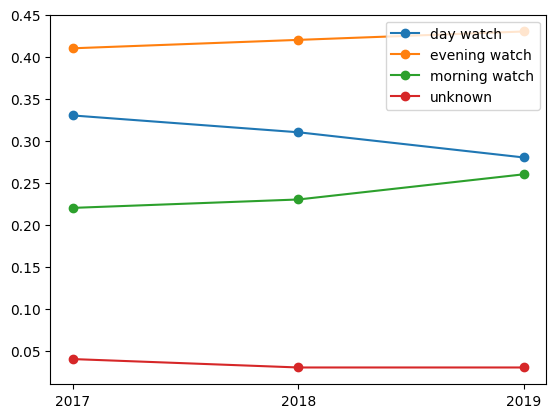

In [87]:
num_rpt_by_yr_shift2.rpt_yr = num_rpt_by_yr_shift2.rpt_yr.astype(int)
dw = num_rpt_by_yr_shift2[num_rpt_by_yr_shift2['Shift Occurence']=='Day Watch']
ew = num_rpt_by_yr_shift2[num_rpt_by_yr_shift2['Shift Occurence']=='Evening Watch']
mw = num_rpt_by_yr_shift2[num_rpt_by_yr_shift2['Shift Occurence']=='Morning Watch']
unk = num_rpt_by_yr_shift2[num_rpt_by_yr_shift2['Shift Occurence']=='Unknown']

plt.plot(dw.rpt_yr, dw.percent, '-o', label='day watch')
plt.plot(ew.rpt_yr, ew.percent, '-o', label='evening watch')
plt.plot(mw.rpt_yr, mw.percent, '-o', label='morning watch')
plt.plot(unk.rpt_yr, unk.percent, '-o', label='unknown')

plt.xticks(ticks=[2017,2018,2019])
plt.legend()
plt.show()

# Hypothesis Test and Confidence Interval

## Statistical Distributions

### Normal distribution

The Normal distribution or Gaussian distribution is by far the most important of all the distribution functions. This is due to the fact that the mean values of all distribution functions approximate a normal distribution for large enough sample numbers. Mathematically, the normal distribution is characterized by a mean value $\mu$, and a standard deviation $\sigma$:
$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

When $\mu=0$ and $\sigma=1$, the distribution is called the `standard normal distribution`:
$$
f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}
$$

The **68-95-997** rule:
![](https://miro.medium.com/max/24000/1*IZ2II2HYKeoMrdLU5jW6Dw.png)

| Range      | Probability within range | Probability outside range |
|------------|--------------------------|---------------------------|
| Mean ± 1SD | 68.3%                    | 31.7%                     |
| Mean ± 2SD | 95.4%                    | 4.6%                      |
| Mean ± 3SD | 99.7%                    | 0.27%                     |

**Generate random samples from the normal distribution**

In [88]:
from scipy import stats

rvs = stats.norm.rvs(loc=0, scale=1, size=5, random_state=123)
rvs

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025])

In [89]:
rvs = stats.norm.rvs(loc=0, scale=1, size=5, random_state=123) # seed
rvs

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025])

In [91]:
rvs = stats.norm.rvs(loc=0, scale=1, size=5)
rvs

array([ 1.23090849, -0.75663022, -0.25577907,  0.7135196 ,  0.29877573])

In [92]:
rvs = stats.norm.rvs(loc=0, scale=1, size=5)
rvs

array([-0.12248136,  1.28847593,  1.36963438, -0.08191368, -1.30175304])

In [99]:
rvs = stats.norm.rvs(loc=0, scale=1, size=5, random_state=12345)
rvs

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057])

In [93]:
type(rvs)

numpy.ndarray

In [94]:
import numpy as np

In [95]:
np.random.seed(123)
np.random.randn(5) # Return a sample (or samples) from the "standard normal" distribution.

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025])

For random samples from $N(\mu, \sigma^2)$, use:

$$\sigma \cdot np.random.randn(...) + \mu$$

In [96]:
import matplotlib.pyplot as plt

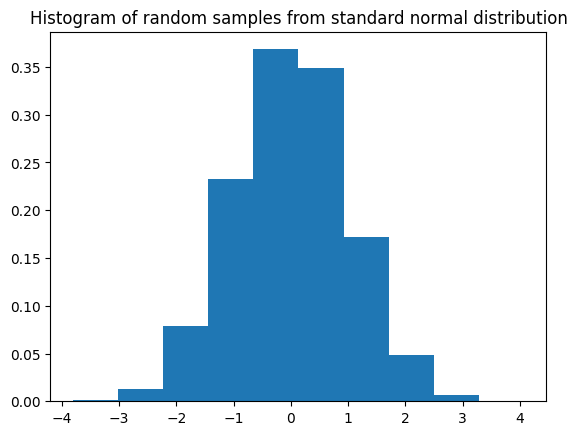

In [97]:
# plt.hist(np.random.randn(10000))
plt.hist(np.random.randn(10000),density=True)
plt.title('Histogram of random samples from standard normal distribution')
plt.show()

**Calculate PDF**

In [100]:
stats.norm.pdf(x=[-3,-2,-1,1,2,3],loc=0,scale=1)

array([0.00443185, 0.05399097, 0.24197072, 0.24197072, 0.05399097,
       0.00443185])

In [ ]:
## you could also do
distNorm = stats.norm(loc=0,scale=1)
distNorm.pdf(x=[-3,-2,-1,1,2,3])

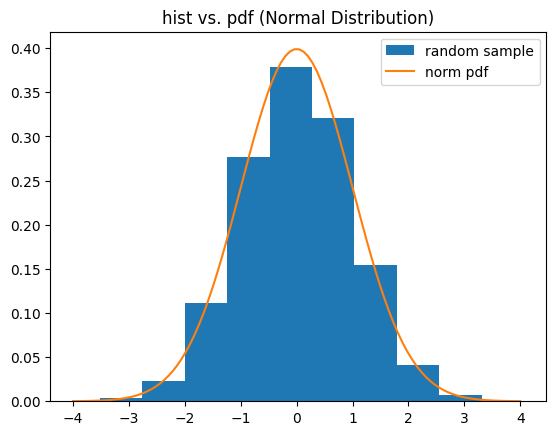

In [101]:
# the histogram from random sample
plt.hist(np.random.randn(10000),density=True,label='random sample') 
# construct the pdf curve
xs = np.linspace(start=-4,stop=4,num=100)
ys = stats.norm.pdf(x=xs)
plt.plot(xs,ys,label='norm pdf')

plt.title('hist vs. pdf (Normal Distribution)')
plt.legend()
plt.show()

**Calculate CDF** (Cumulative Distribution Function)

In [102]:
stats.norm.cdf(x=[-3,-2,-1,1,2,3],loc=0,scale=1)

array([0.0013499 , 0.02275013, 0.15865525, 0.84134475, 0.97724987,
       0.9986501 ])

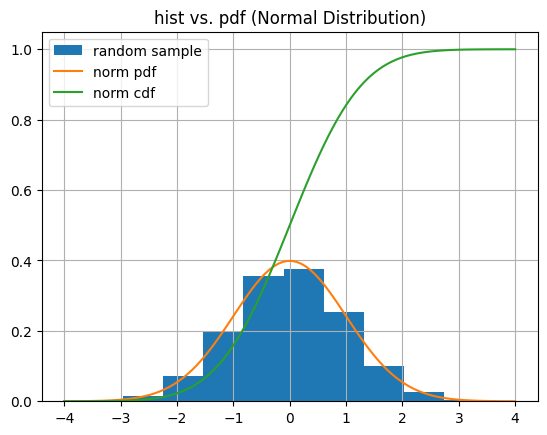

In [103]:
# the histogram from random sample
plt.hist(np.random.randn(10000),density=True,label='random sample') 
# construct the pdf curve
xs = np.linspace(start=-4,stop=4,num=100)
ys_pdf = stats.norm.pdf(x=xs)
plt.plot(xs,ys_pdf,label='norm pdf')

# construct the cdf curve
ys_cdf = stats.norm.cdf(x=xs)
plt.plot(xs,ys_cdf,label='norm cdf')

plt.title('hist vs. pdf (Normal Distribution)')
plt.legend()
plt.grid()
plt.show()

**`ppf`: Percent Point Function (Inverse of CDF)**

In [104]:
stats.norm.ppf([0.05,0.95])

array([-1.64485363,  1.64485363])

**Central limit theorem**

https://en.wikipedia.org/wiki/Central_limit_theorem

In probability theory, the **central limit theorem (CLT)** establishes that in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a bell curve), even if the original variables themselves are not normally distributed. The theorem is a key concept in probability theory, because it implies that probabilistic and statistical methods that work for normal distributions can be applied to many problems involving other types of distributions.

More specifically, central limit theorem states that if $ X_{1},X_{2},...,X_{n}$ are each a random sample of size $n$, taken from a population with mean $\mu$ and finite variance $\sigma^2$ and if $\bar{X}$ is the sample mean, then the limiting form of the distribution of $Z=\frac {{\bar {X}}_{n}-\mu }{\sigma /\surd n}$ as $n\to \infty$, is the standard normal distribution.

![](https://i.ytimg.com/vi/4YLtvNeRIrg/maxresdefault.jpg)

### $t$ distribution

The sample distribution of mean values for samples from a normally distributed population. Typically used for small sample numbers, when the true mean/SD are not known.

If $\bar{x}$ is the sample mean, and $s$ is the sample standard deviation, then
$$
\frac{\bar{x}-\mu}{s/\sqrt{n}} \sim t_{\nu}
$$ where $\nu=n-1$ represents the degree of freedom, and $n$ is the sample size.

When $n$ is large enough, $t$ distribution asymptotically approaches standard normal distribution

In [105]:
# generate random numbers from the t distribution

n = 20
df = n - 1
rvs = stats.t.rvs(df=df,size=5,random_state=123)
rvs

array([-0.94529783,  1.65722056, -2.65632182, -0.3537019 ,  1.69379771])

In [106]:
rvs = stats.t.rvs(df,size=5,random_state=123)
rvs

array([-0.94529783,  1.65722056, -2.65632182, -0.3537019 ,  1.69379771])

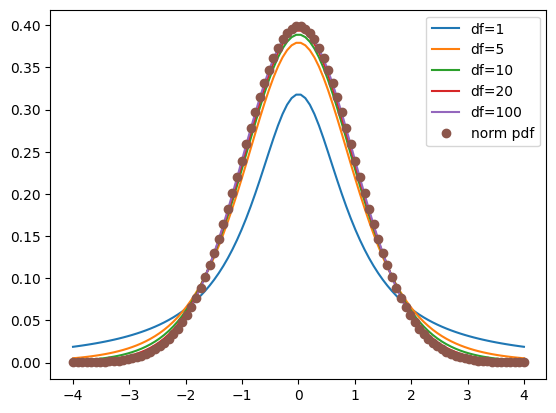

In [110]:
# plot the pdf of t distribution
xs = np.linspace(start=-4,stop=4,num=100)
ys_1 = stats.t.pdf(x=xs,df=1)
ys_5 = stats.t.pdf(x=xs,df=5)
ys_10 = stats.t.pdf(x=xs,df=10)
ys_20 = stats.t.pdf(x=xs,df=20)
ys_100 = stats.t.pdf(x=xs,df=100)
plt.plot(xs,ys_1,label='df=1')
plt.plot(xs,ys_5,label='df=5')
plt.plot(xs,ys_10,label='df=10')
plt.plot(xs,ys_20,label='df=20')
plt.plot(xs,ys_100,label='df=100')

# plot the pdf of standard normal distribution
ys = stats.norm.pdf(x=xs)
plt.plot(xs,ys,'o',label='norm pdf')
plt.legend()
plt.show()

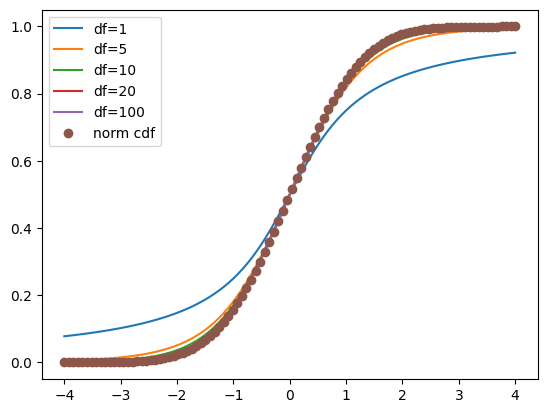

In [111]:
# plot the cdf of t distribution
xs = np.linspace(start=-4,stop=4,num=100)
ys_1 = stats.t.cdf(x=xs,df=1)
ys_5 = stats.t.cdf(x=xs,df=5)
ys_10 = stats.t.cdf(x=xs,df=10)
ys_20 = stats.t.cdf(x=xs,df=20)
ys_100 = stats.t.cdf(x=xs,df=100)
plt.plot(xs,ys_1,label='df=1')
plt.plot(xs,ys_5,label='df=5')
plt.plot(xs,ys_10,label='df=10')
plt.plot(xs,ys_20,label='df=20')
plt.plot(xs,ys_100,label='df=100')
# plot the cdf of standard normal distribution
ys = stats.norm.cdf(x=xs)
plt.plot(xs,ys,'o',label='norm cdf')
plt.legend()
plt.show()

**`ppf`: Percent Point Function (Inverse of CDF)**

In [112]:
# when n=20, df = n-1 =19
stats.t.ppf([0.05,0.95],df=df)

array([-1.72913281,  1.72913281])

### $\chi^2 distribution$
$\chi^2$ (chi-square) distribution describes the distribution of the summed squares of random variates from a standard normal distribution. The sum squares of $n$ independent random samples from standard normal distribution follows a chi-square distribution of $n$ degrees of freedom:
$$
\sum_{i=1}^{n}X_i^2 \sim \chi_n^2
$$
For $n$ independent random samples from normal distribution with a standard deviation of $\sigma$, the following test statistic follows the chi-square distribution of $n-1$ degrees of freedom:
$$
\sum_{i=1}^{n}(\frac{X_i-\bar{X}}{\sigma})^2 = (n-1)\frac{s}{\sigma^2} \sim \chi_{n-1}^2
$$
where $s$ stands for sample standard deviation. This can be used in hypothesis test of comparison between sample standard deviation and population standard deviation.

It is also commonly used in statistical independence or association between two or more categorical variables using the following test statistic:
$$
\sum_{i=1}^{k}\frac{({frequency}_{observed} - {frequency}_{expected})^2}{{frequency}_{expected}} \sim \chi_{df}^2
$$
where 
$$
df = k - 1 - #_parameters_estimated
$$ see example here: http://sites.utexas.edu/sos/guided/inferential/categorical/chi2/


In [113]:
n = 20
df = n-1
rvs = stats.chi2.rvs(df=df,size=5,random_state=123)
rvs

array([12.51393828, 25.05996342, 15.04818121, 30.26163094,  7.21528779])

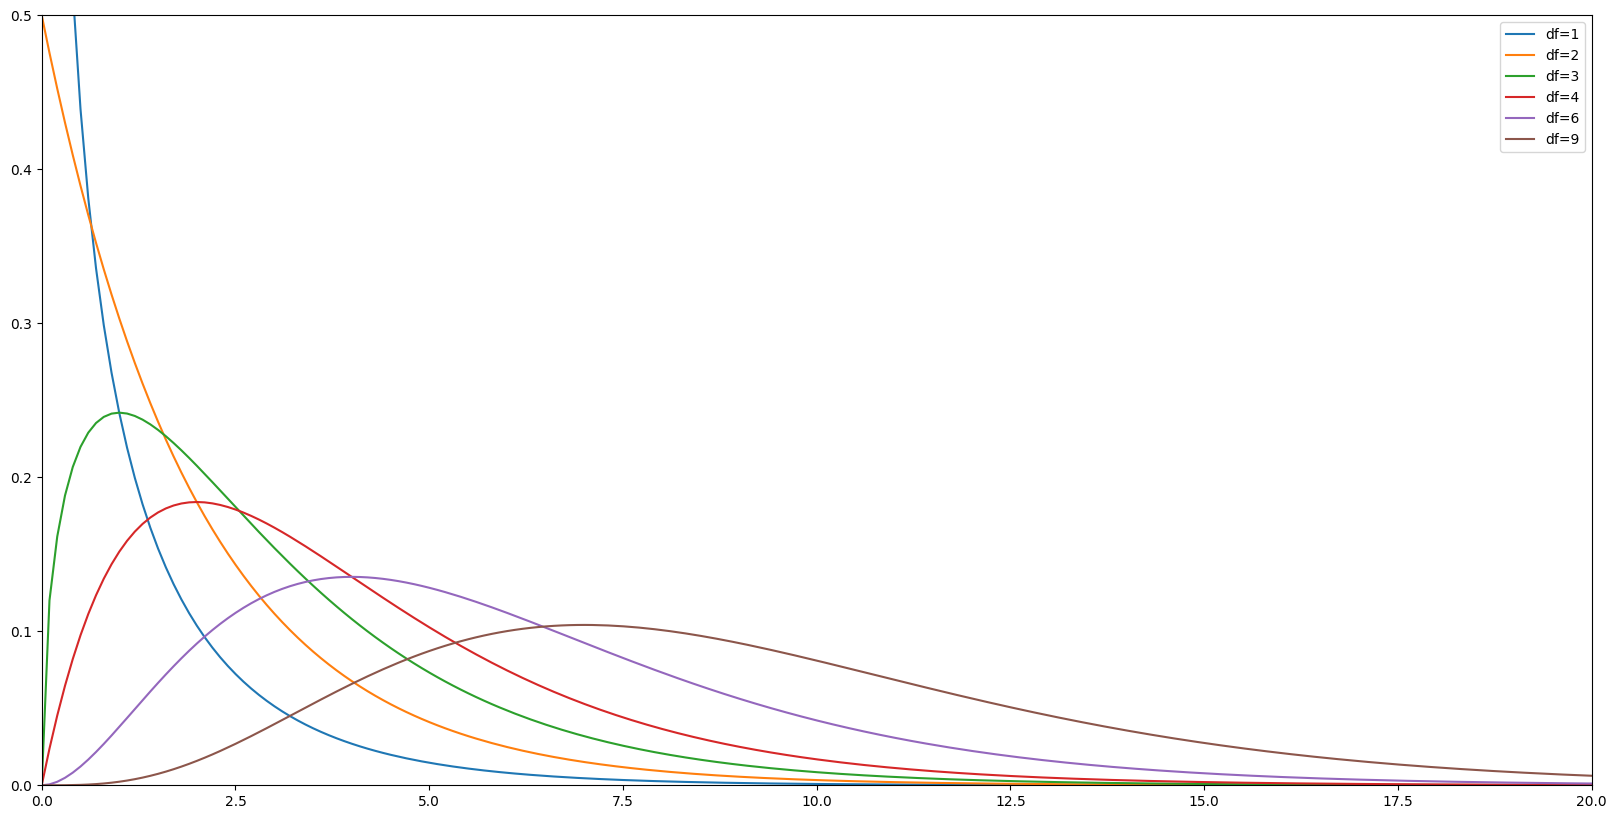

In [114]:
# plot the pdf of chi2 distribution
plt.figure(figsize=(20,10))

xs = np.linspace(start=0,stop=100,num=1000)
ys_1 = stats.chi2.pdf(x=xs,df=1)
ys_2 = stats.chi2.pdf(x=xs,df=2)
ys_3 = stats.chi2.pdf(x=xs,df=3)
ys_4 = stats.chi2.pdf(x=xs,df=4)
ys_6 = stats.chi2.pdf(x=xs,df=6)
ys_9 = stats.chi2.pdf(x=xs,df=9)
plt.plot(xs,ys_1,label='df=1')
plt.plot(xs,ys_2,label='df=2')
plt.plot(xs,ys_3,label='df=3')
plt.plot(xs,ys_4,label='df=4')
plt.plot(xs,ys_6,label='df=6')
plt.plot(xs,ys_9,label='df=9')
plt.xlim(0,20)
plt.ylim(0,0.5)
plt.legend()
plt.show()


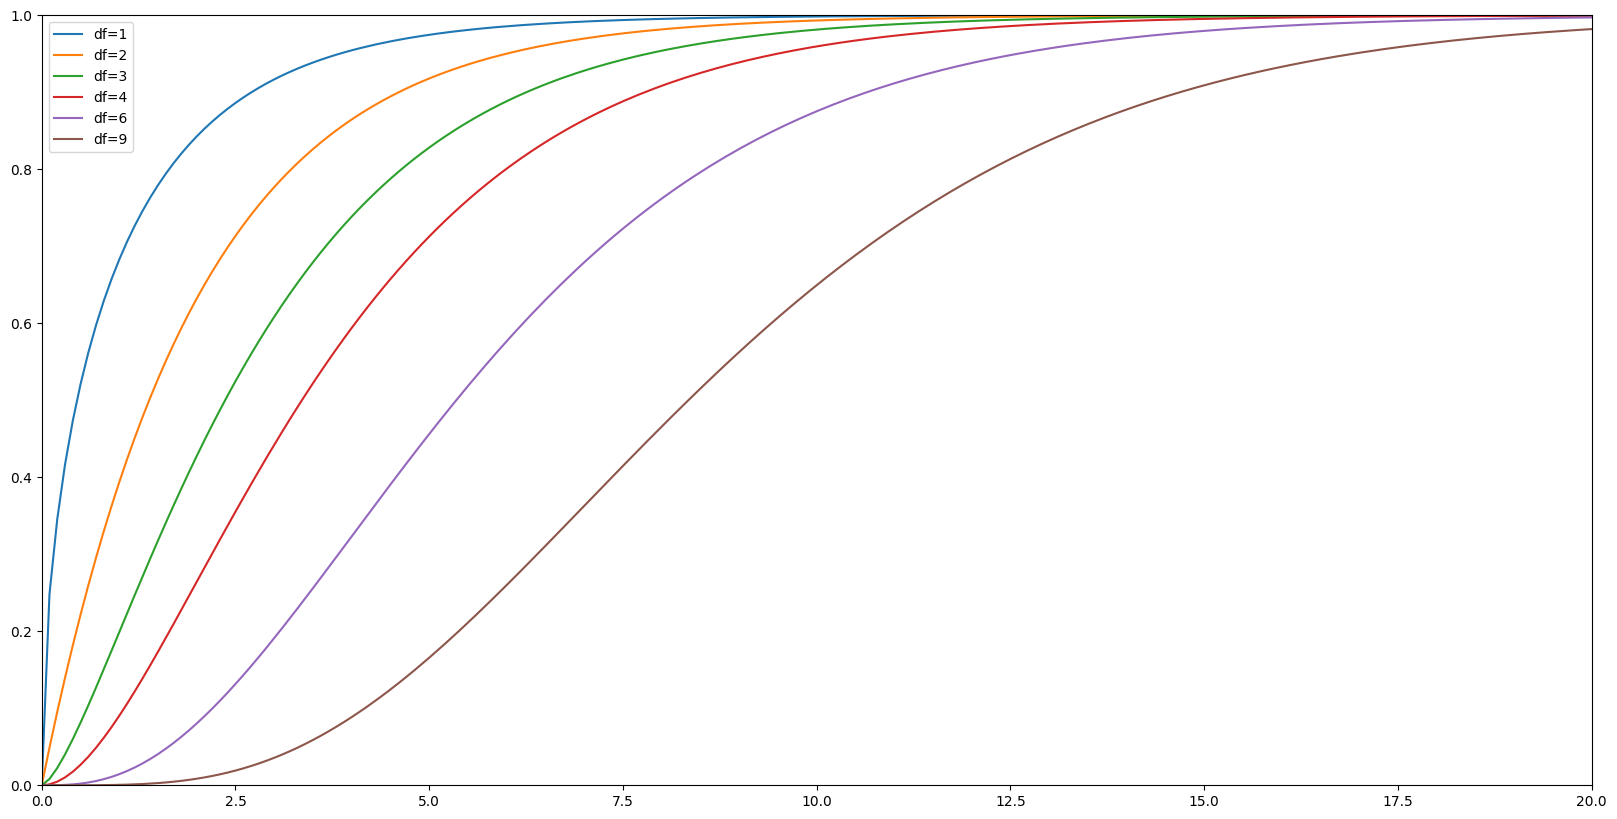

In [115]:
# plot the cdf of chi2 distribution
plt.figure(figsize=(20,10))

xs = np.linspace(start=0,stop=100,num=1000)
ys_1 = stats.chi2.cdf(x=xs,df=1)
ys_2 = stats.chi2.cdf(x=xs,df=2)
ys_3 = stats.chi2.cdf(x=xs,df=3)
ys_4 = stats.chi2.cdf(x=xs,df=4)
ys_6 = stats.chi2.cdf(x=xs,df=6)
ys_9 = stats.chi2.cdf(x=xs,df=9)
plt.plot(xs,ys_1,label='df=1')
plt.plot(xs,ys_2,label='df=2')
plt.plot(xs,ys_3,label='df=3')
plt.plot(xs,ys_4,label='df=4')
plt.plot(xs,ys_6,label='df=6')
plt.plot(xs,ys_9,label='df=9')
plt.xlim(0,20)
plt.ylim(0,1)
plt.legend()
plt.show()

**`ppf`: Percent Point Function (Inverse of CDF)**

In [116]:
# when df=9
stats.chi2.ppf([0.05,0.95],df=9)

array([ 3.32511284, 16.9189776 ])

### $F$ distribution

This distribution is named after Sir Ronald Fisher, who developed the F distribution for use in determining critical values in **ANOVAs** (`Analysis Of Variance`).

If we want to investigate whether two groups have the same variance, we have to calculate the ratio of the sample standard deviations squared (assume $S_1^2 > S_2^2$):
$$
\frac{S_1^2}{S_2^2} \sim F_{df_1,df_2} = \frac{\chi_{df_1}^2/df_1}{\chi_{df_2}^2/df_2} \sim F_{N_1-1,N_2-1}
$$
where $\chi_{df_1}^2$ and $\chi_{df_2}^2$ are the chi-squared statistics of sample one and two respectively, and $df_1$ and $df_2$ are their degrees of freedom, in which case
$$
df_1 = N_1-1
$$
and
$$
df_2 = N_2-1
$$ ($N_1$ and $N_2$ are sample sizes of the two samples)

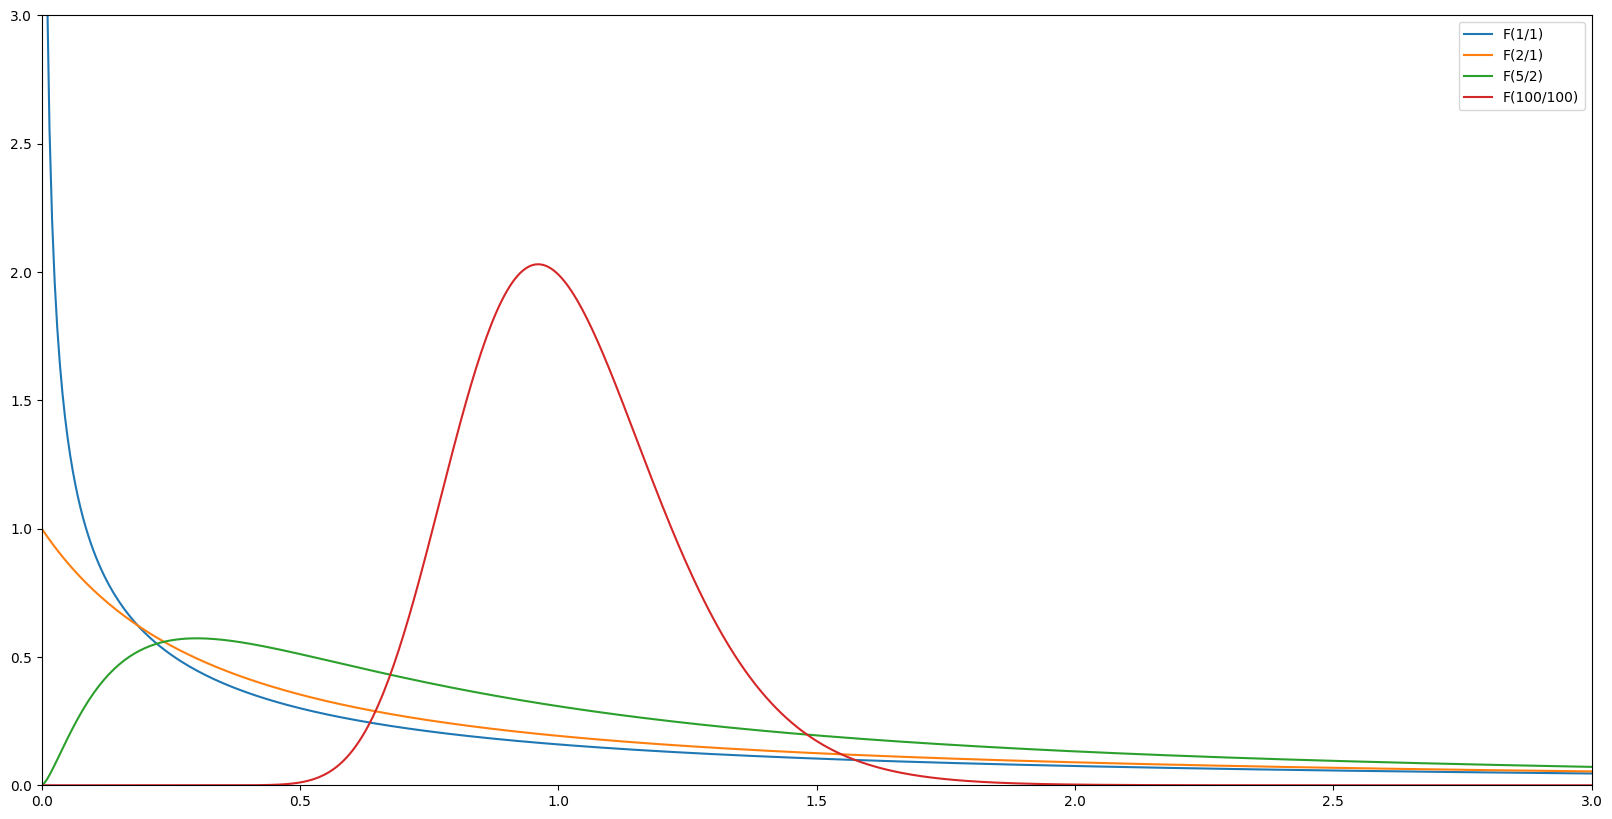

In [117]:
# plot the pdf of F distribution
plt.figure(figsize=(20,10))

xs = np.linspace(start=0,stop=5,num=1000)
ys_11 = stats.f.pdf(x=xs,dfn=1,dfd=1)
ys_21 = stats.f.pdf(x=xs,dfn=2,dfd=1)
ys_52 = stats.f.pdf(x=xs,dfn=5,dfd=2)
ys_100100 = stats.f.pdf(x=xs,dfn=100,dfd=100)
plt.plot(xs,ys_11,label='F(1/1)')
plt.plot(xs,ys_21,label='F(2/1)')
plt.plot(xs,ys_52,label='F(5/2)')
plt.plot(xs,ys_100100,label='F(100/100)')

plt.xlim(0,3)
plt.ylim(0,3)
plt.legend()
plt.show()

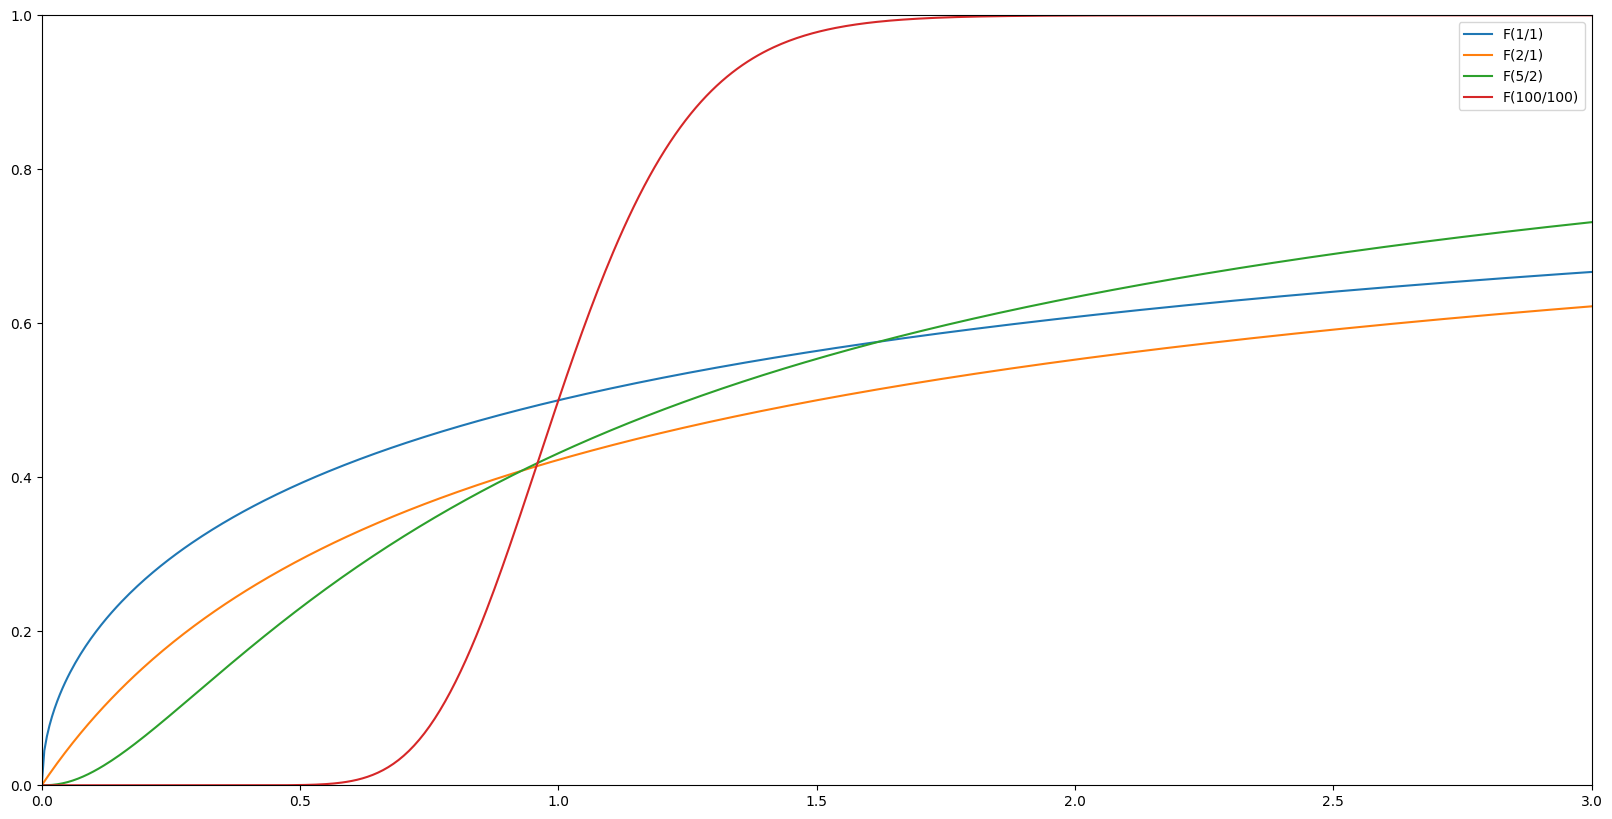

In [118]:
# plot the cdf of F distribution
plt.figure(figsize=(20,10))

xs = np.linspace(start=0,stop=5,num=1000)
ys_11 = stats.f.cdf(x=xs,dfn=1,dfd=1)
ys_21 = stats.f.cdf(x=xs,dfn=2,dfd=1)
ys_52 = stats.f.cdf(x=xs,dfn=5,dfd=2)
ys_100100 = stats.f.cdf(x=xs,dfn=100,dfd=100)
plt.plot(xs,ys_11,label='F(1/1)')
plt.plot(xs,ys_21,label='F(2/1)')
plt.plot(xs,ys_52,label='F(5/2)')
plt.plot(xs,ys_100100,label='F(100/100)')

plt.xlim(0,3)
plt.ylim(0,1)
plt.legend()
plt.show()

**`ppf`: Percent Point Function (Inverse of CDF)**

In [119]:
# when dfn=100, dfd=100
stats.f.ppf([0.05,0.95],dfn=100,dfd=100)

array([0.71853557, 1.39171955])

## Hypothesis Test

wikipedia: https://en.wikipedia.org/wiki/Statistical_hypothesis_testing

`Hypothesis` is a statement about a parameter. A `hypothesis test` is a standard procedure to test a statement (the `hypothesis`), and typically we need to select between two complementary `hypothesis`:
* `Null hypothesis` ($H_0$): A statment about an established fact of a parameter. The null hypothesis is generally assumed to be true until evidence indicates otherwise (similar to the case that a defendant of a jury trial is presumed innocent until proven guilty). It is normally expressed as Math equation, and **it must contain a condition of equality, such as $=,\geq, \leq $**.
* `Alternative hypothesis` ($H_1$): A statement that the parameter has a value that differs from the null hypothesis.
 Needs a strong support from data to change our thinking and contradicts Ho. Expressed as Math statement it contains $\neq, <, >$.

We also need a `test statistic` (a quantity derived from the sample). Typically it is selected or defined in such a way as to quantify, within observed data, behaviours that would distinguish the `null` from the `alternative hypothesis`, where such an alternative is prescribed, or that would characterize the null hypothesis if there is no explicitly stated alternative hypothesis. Normally, we should have a good idea on the sampling distribution of the test statistic.
* List of commonly used `test statistic`: https://en.wikipedia.org/wiki/Test_statistic

| Null Hypothesis        | Alternative Hypothesis      | Type of Alternative |
|------------------------|-----------------------------|---------------------|
|                        | $H_1$: $\theta < \theta_0$    | lower one-sided     |
| $H_0$: $\theta=\theta_0$ | $H_1$: $\theta > \theta_0$    | upper one-sided     |
|                        | $H_1$: $\theta \neq \theta_0$ | two-sided           |

|                                   | $H_0$ is true (Truly not guilty) |    $H_1$ is true (Truly guilty)   |
|-----------------------------------|---------------------------|----------------------------|
|  Accept null hypothesis Acquittal |        Right decision       | Wrong decision **Type II Error** |
| Reject null hypothesis Conviction | Wrong decision **Type I Error** |        Right decision        |

### One Population Proportion

**Example: How to tell if a coin is fair?**

**Problem**: Suppose we tossed a coin 100 times and we have obtained 38
Heads and 62 Tails. Is the coin biased toward tails? 

$H_0$: $p_{head} = 0.5$

$H_1$: $p_{head} \neq 0.5$ (two-sided)

Significance level $\alpha=0.05$

`Test statistic`: $z = \frac{\hat{p}-p_0}{SD(p_0)} \sim N(0,1)$ according to `central limit theorem`, where $SD(p_0) =\sqrt{\frac{p_0q_0}{n}} = \sqrt{\frac{p_0(1-p_0)}{n}} $.
![](https://www.investopedia.com/thmb/pF9cbALKXUA617NzyoKozi1B0rQ=/954x380/filters:no_upscale():max_bytes(150000):strip_icc()/Clipboard01-5c94e6b446e0fb00010ae8ed.jpg)

In [120]:
n = 100
p = 38/n
sd = (p*(1-p)/n)**0.5
z = (p-0.5)/sd

In [121]:
z

-2.4722569302909876

In [122]:
p = 2 * stats.norm.cdf(z) # two-sided

In [123]:
p

0.013426298293326975

In [124]:
stats.norm.ppf([0.025,0.975]) # the 5% confidence interval boundary for two-sided alternative hypothesis

array([-1.95996398,  1.95996398])

We can also do t-test: $t = \frac{\hat{p}-p_0}{SD(p_0)} \sim t_{n-1}$

In [125]:
p = 2 * stats.t.cdf(z, df = n-1) # two-sided
p

0.015131634778085726

In [126]:
stats.t.ppf([0.025,0.975], df=n-1) # the 5% confidence interval boundary for two-sided alternative hypothesis

array([-1.98421695,  1.98421695])

We can also use the `statsmodels` library to do the z-test

In [ ]:
import statsmodels.api as sm

In [ ]:
sm.stats.proportions_ztest(count=38,nobs=100,value=0.5,alternative='two-sided')

### Two Population Proportion Difference

**Problem**: A car manufacturer aims to improve the quality of the products by reducing the defects and also increase the customer satisfaction. Therefore, he monitors the efficiency of two assembly lines in the shop floor. In line A there are 18 defects reported out of 200 samples. While the line B shows 25 defects out of 600 cars. At α 5%, is the differences between two assembly procedures are significant?

$H_0$: $p_1 - p_2 = 0$

$H_1$: $p_1 - p_2 \neq 0$ (two-sided)

Significance level $\alpha=0.05$

`Test statistic`: $z = \frac{\hat{p_1}-\hat{p_2} - 0}{SD} \sim N(0,1)$ according to `central limit theorem`, where $SD = \sqrt{p_0(1-p_0)(\frac{1}{n_1}+\frac{1}{n_2})}$, and $p_0 = \frac{x_1+x_2}{n_1+n_2}$.

In [ ]:
import math

x1 = 18
n1 = 200
x2 = 25
n2 = 600

p1 = x1/n1
p2 = x2/n2
p0 = (x1+x2)/(n1+n2)
# sd = math.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
sd = math.sqrt(p0*(1-p0)*(1/n1 + 1/n2))
z = (p1-p2)/sd
z

In [ ]:
p = 2 * (1-stats.norm.cdf(z)) # two-sided
p

In [ ]:
p1, p2

We can also use the `statsmodels` library to do the z-test

In [ ]:
sm.stats.proportions_ztest(
    count=np.array([x1,x2]),
    nobs=np.array([n1,n2]),
    value=0,
    alternative='two-sided'
)

In [ ]:
sm.stats.proportions_ztest(
    count=np.array([x1,x2]),
    nobs=np.array([n1,n2]),
    value=0,
    alternative='larger'
)

### One Population Mean

**Problem**: Your company wants to improve sales. Past sales data indicate that the average sale was \\$100 per transaction. After training your sales force, recent sales data (taken from a sample of 25 salesmen) indicates an average sale of \\$130, with a standard deviation of \\$15. Did the training work? Test your hypothesis at a 5\% alpha level.

$H_0$: $\mu = \mu_0$

$H_1$: $\mu \geq \mu_0$ (upper one-side)

Significance level $\alpha=0.05$

`z-test`: $z = \frac{\bar{x} - \mu_0}{s/\sqrt{n}} \sim N(0,1)$, where $s$ is the sample standard deviation

`t-test`: $t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}} \sim t_{n-1}$, where $s$ is the sample standard deviation, and $n$ is the sample size

In [ ]:
## z-test
mu0 = 100
xbar = 130
n = 25
s = 15

z = (xbar - mu0)/(s/math.sqrt(n))
z

In [ ]:
p = 1-stats.norm.cdf(z)
p

In [ ]:
## t-test
t = z
p = 1-stats.t.cdf(t, df=n-1)
p

### Two Population Mean Difference

**Problem #1**: Does right‐ or left‐handedness affect how fast people type? Random samples of students from a typing class are given a typing speed test (words per minute), and the results are compared. Significance level for the test: 0.10. Because you are looking for a difference between the groups in either direction (right‐handed faster than left, or vice versa), this is a two‐tailed test.

| Group | Handedness | n  | $\bar{x}$ | s   |
|-------|------------|----|-----------|-----|
| 1     | Left       | 9  | 59.3      | 4.3 |
| 2     | Right      | 16 | 55.8      | 5.7 |

$H_0$: $\mu_1 - \mu_2 = 0$

$H_1$: $\mu_1 - \mu_2 \neq 0$ (two-sided)

Significance level $\alpha=0.05$

Like before, assume the two groups have the same variance, we could do either `z-test` or `t-test`.
$$
\frac{\bar{x_1} - \bar{x_2} - 0}{\sqrt{s_p^2(\frac{1}{n_1} + \frac{1}{n_2})}} \sim N(0,1)
$$
or
$$
\frac{\bar{x_1} - \bar{x_2} - 0}{\sqrt{s_p^2(\frac{1}{n_1} + \frac{1}{n_2})}} \sim t_{n_1+n_2-2}
$$
Here, $s_p$ is the pooled variance $s_p^2 = \frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}$


In [ ]:
n1 = 9
n2 = 16

xbar1 = 59.3
xbar2 = 55.8

s1 = 4.3
s2 = 5.7

sp = math.sqrt(((n1-1)*(s1**2) + (n2-1)*(s2**2))/(n1+n2-2))
sp

In [ ]:
# z test
z = (xbar1 - xbar2)/(sp*math.sqrt(1/n1+1/n2))
z

In [ ]:
p = (1-stats.norm.cdf(z))*2
p

In [ ]:
## t-test
t = z
p = (1-stats.t.cdf(t, df=n1+n2-2))*2
p

**Problem #2**: An experiment is conducted to determine whether intensive tutoring (covering a great deal of material in a fixed amount of time) is more effective than paced tutoring (covering less material in the same amount of time). Two randomly chosen groups are tutored separately and then administered proficiency tests. Use a significance level of α < 0.05.

| Group | Method | n  | $\bar{x}$ | s   |
|-------|------------|----|-----------|-----|
| 1     | Intensive       | 12  | 46.31      | 6.44 |
| 2     | Paced      | 10 | 42.79      | 7.52 |


$H_0$: $\mu_1 - \mu_2 = 0$

$H_1$: $\mu_1 - \mu_2 \neq 0$ (two-sided)

Significance level $\alpha=0.05$

Like before, assume the two groups have the same variance, we could do either `z-test` or `t-test`.
$$
\frac{\bar{x_1} - \bar{x_2} - 0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} \sim N(0,1)
$$
or
$$
\frac{\bar{x_1} - \bar{x_2} - 0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} \sim t_{n_1+n_2-2}
$$



In [ ]:
n1 = 12
n2 = 10

xbar1 = 46.31
xbar2 = 42.79

s1 = 6.44
s2 = 7.52

# z-test
z = (xbar1-xbar2)/math.sqrt(s1**2/n1 + s2**2/n2)
z

In [ ]:
p = (1-stats.norm.cdf(z))*2
p

In [ ]:
# t-test

t = z
p = (1-stats.t.cdf(t, df=n1+n2-2))*2
p